In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("penguins.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [3]:
xLabel = "Culmen Length (mm)"
hue1 = "Sex"

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

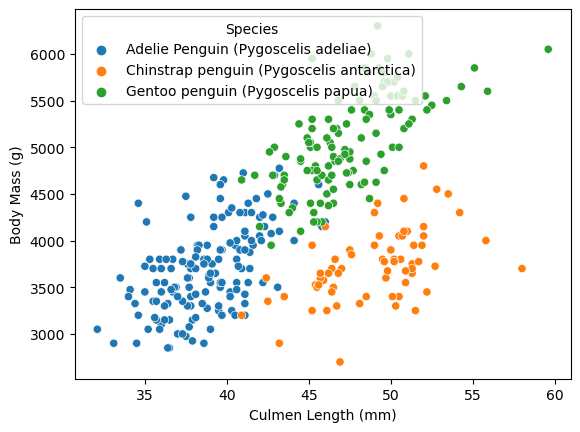

In [4]:
sns.scatterplot(data=df, x=xLabel, y="Body Mass (g)", hue = "Species")

In [5]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

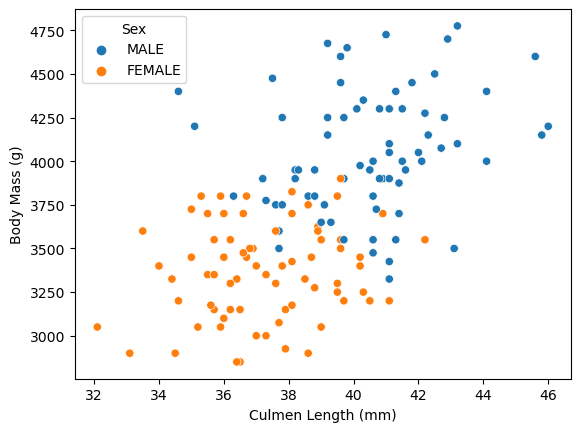

In [6]:
sns.scatterplot(data=df[df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"], x=xLabel, y="Body Mass (g)", hue=hue1)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

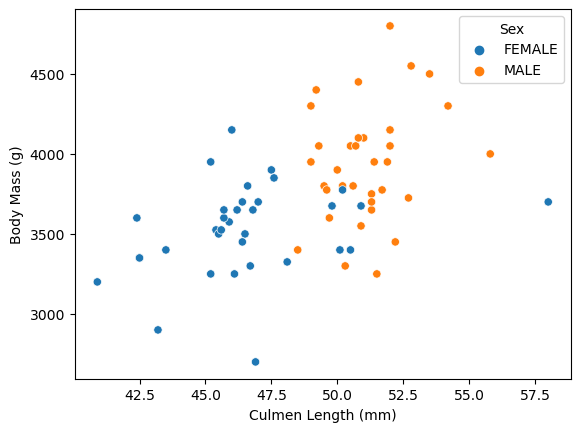

In [7]:
sns.scatterplot(data=df[df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"], x=xLabel, y="Body Mass (g)", hue=hue1)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

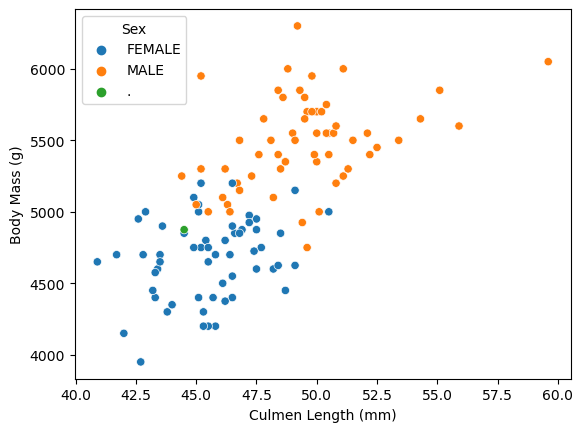

In [8]:
sns.scatterplot(data=df[df['Species'] == "Gentoo penguin (Pygoscelis papua)"], x=xLabel, y="Body Mass (g)", hue=hue1)

In [9]:
def getLinearPrediction(xValue, slope, intercept, shift):
    return slope*(xValue + shift) + intercept

def getRMSEAccuracy(df, slope, intercept, xLabel, yLabel, shift):
    squared_errors = 0

    for i in range(len(df[yLabel])):
        dataY = df.iloc[i][yLabel]
        dataX = df.iloc[i][xLabel]
        prediction = getLinearPrediction(dataX, slope, intercept, shift)
        
        # Calculate squared error and clip it
        squared_errors += (prediction - dataY)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df[yLabel])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [10]:
def findOptimalLinearEquation(df, xLabel, yLabel, slope_range, intercept_range, shift):
    best_slope = None
    best_intercept = None
    best_accuracy = float('inf')  # Initialize with a high value
    
    total_iterations = len(slope_range) * len(intercept_range)
    current_iteration = 0

    for slope in slope_range:
        for intercept in intercept_range:
            accuracy = getRMSEAccuracy(df, slope, intercept, xLabel, yLabel, shift)

            # Update the best values if the current accuracy is lower
            if accuracy < best_accuracy:
                best_slope = slope
                best_intercept = intercept
                best_accuracy = accuracy
                
                print("Current Slope:", best_slope)
                print("Current Intercept:", best_intercept)
                print("Current RMSE Accuracy:", best_accuracy)
            
            current_iteration += 1
            progress_percentage = (current_iteration / total_iterations) * 100
            #print(f"Progress: {progress_percentage:.2f}%")

    return best_slope, best_intercept, best_accuracy

In [11]:
def loopOptimalEquation(df, lastOptimalSlope, lastOptimalIntercept, lastOptimalSlopeIteration, lastOptimalInterceptIteration, xLabel, yLabel, shift):
    for i in range(1, 10):
        
        print("Slope Range: "+str(lastOptimalSlope-lastOptimalSlopeIteration)+" "+str(lastOptimalSlope+lastOptimalSlopeIteration))
        print("Intercept Range: "+str(lastOptimalIntercept-lastOptimalInterceptIteration)+" "+str(lastOptimalIntercept+lastOptimalInterceptIteration))
        
        optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, 
                                                     xLabel, 
                                                     yLabel, 
                                                     np.arange(lastOptimalSlope-lastOptimalSlopeIteration, lastOptimalSlope+lastOptimalSlopeIteration, lastOptimalSlopeIteration/10), 
                                                     np.arange(lastOptimalIntercept-lastOptimalInterceptIteration, lastOptimalIntercept+lastOptimalInterceptIteration, lastOptimalInterceptIteration/10), 
                                                     shift)
        
        lastOptimalSlopeIteration =lastOptimalSlopeIteration / 10
        lastOptimalInterceptIteration = lastOptimalInterceptIteration / 10
        lastOptimalSlope = optimal_slope
        lastOptimalIntercept = optimal_intercept
        
        print("NEW Optimal Slope:", optimal_slope)
        print("NEW Optimal Intercept:", optimal_intercept)
        print("NEW Optimal RMSE Accuracy:", optimal_accuracy)

    print("FINAL Optimal Slope:", optimal_slope)
    print("FINAL Optimal Intercept:", optimal_intercept)
    print("FINAL Optimal RMSE Accuracy:", optimal_accuracy)
    return optimal_slope, optimal_intercept, optimal_accuracy

In [12]:


def findOptimalValues(df, xLabel, yLabel, slopeRange, interceptRange, shift, slopeIteration, interceptIteration):
    optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, xLabel, yLabel, slopeRange, interceptRange, shift)

    print("START Optimal Slope:", optimal_slope)
    print("START Optimal Intercept:", optimal_intercept)
    print("START Optimal RMSE Accuracy:", optimal_accuracy)
    print("Starting Optimal Regression Loop...")

    return loopOptimalEquation(df, optimal_slope, optimal_intercept, slopeIteration, interceptIteration, xLabel, yLabel, shift)


In [13]:
gentoo_df = df[df['Species'] == "Gentoo penguin (Pygoscelis papua)"].copy()
gentoo_df.dropna(subset=[xLabel], inplace=True)
gentoo_df.dropna(subset=["Body Mass (g)"], inplace=True)

chinstrap_df = df[df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"].copy()
chinstrap_df.dropna(subset=[xLabel], inplace=True)
chinstrap_df.dropna(subset=["Body Mass (g)"], inplace=True)

adelie_df = df[df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"].copy()
adelie_df.dropna(subset=[xLabel], inplace=True)
adelie_df.dropna(subset=["Body Mass (g)"], inplace=True)



In [14]:
gentooSlope, gentooIntercept, gentooRMSE = findOptimalValues(gentoo_df, xLabel, "Body Mass (g)", np.arange(0, 300, 100), np.arange(2500, 3500, 100), -14, 100, 100)

chinstrapSlope, chinstrapIntercept, chinstrapRMSE = findOptimalValues(chinstrap_df, xLabel, "Body Mass (g)", np.arange(0, 300, 100), np.arange(2500, 3500, 100), -14, 100, 100)

adelieSlope, adelieIntercept, adelieRMSE = findOptimalValues(adelie_df, xLabel, "Body Mass (g)", np.arange(0, 300, 100), np.arange(2500, 3500, 100), -32, 100, 100)

Current Slope: 0
Current Intercept: 2500
Current RMSE Accuracy: 2624.48601239715
Current Slope: 0
Current Intercept: 2600
Current RMSE Accuracy: 2526.405267813494
Current Slope: 0
Current Intercept: 2700
Current RMSE Accuracy: 2428.481073676147
Current Slope: 0
Current Intercept: 2800
Current RMSE Accuracy: 2330.7331621553617
Current Slope: 0
Current Intercept: 2900
Current RMSE Accuracy: 2233.1846813772954
Current Slope: 0
Current Intercept: 3000
Current RMSE Accuracy: 2135.8629565366996
Current Slope: 0
Current Intercept: 3100
Current RMSE Accuracy: 2038.8004603376885
Current Slope: 0
Current Intercept: 3200
Current RMSE Accuracy: 1942.0360617250778
Current Slope: 0
Current Intercept: 3300
Current RMSE Accuracy: 1845.616648442501
Current Slope: 0
Current Intercept: 3400
Current RMSE Accuracy: 1749.599257251674
Current Slope: 100
Current Intercept: 2500
Current RMSE Accuracy: 860.1422646557687
START Optimal Slope: 100
START Optimal Intercept: 2500
START Optimal RMSE Accuracy: 860.1422

Current Slope: 40.0
Current Intercept: 2510.0
Current RMSE Accuracy: 1298.9548143627235
Current Slope: 40.0
Current Intercept: 2520.0
Current RMSE Accuracy: 1289.5220769695532
Current Slope: 40.0
Current Intercept: 2530.0
Current RMSE Accuracy: 1280.0979510286086
Current Slope: 40.0
Current Intercept: 2540.0
Current RMSE Accuracy: 1270.6826281426117
Current Slope: 40.0
Current Intercept: 2550.0
Current RMSE Accuracy: 1261.2763054537998
Current Slope: 40.0
Current Intercept: 2560.0
Current RMSE Accuracy: 1251.8791858382178
Current Slope: 40.0
Current Intercept: 2570.0
Current RMSE Accuracy: 1242.491478107891
Current Slope: 40.0
Current Intercept: 2580.0
Current RMSE Accuracy: 1233.1133972212385
Current Slope: 40.0
Current Intercept: 2590.0
Current RMSE Accuracy: 1223.745164502102
Current Slope: 50.0
Current Intercept: 2400.0
Current RMSE Accuracy: 1083.5342840517078
Current Slope: 50.0
Current Intercept: 2410.0
Current RMSE Accuracy: 1074.3049369527143
Current Slope: 50.0
Current Interc

Current Slope: 72.0
Current Intercept: 2393.0
Current RMSE Accuracy: 475.0516887580443
Current Slope: 72.0
Current Intercept: 2394.0
Current RMSE Accuracy: 474.4826413163806
Current Slope: 72.0
Current Intercept: 2395.0
Current RMSE Accuracy: 473.91502068331647
Current Slope: 72.0
Current Intercept: 2396.0
Current RMSE Accuracy: 473.34883199176437
Current Slope: 72.0
Current Intercept: 2397.0
Current RMSE Accuracy: 472.7840803862443
Current Slope: 72.0
Current Intercept: 2398.0
Current RMSE Accuracy: 472.2207710227979
Current Slope: 72.0
Current Intercept: 2399.0
Current RMSE Accuracy: 471.6589090689002
Current Slope: 72.0
Current Intercept: 2400.0
Current RMSE Accuracy: 471.09849970336796
Current Slope: 72.0
Current Intercept: 2401.0
Current RMSE Accuracy: 470.5395481162699
Current Slope: 72.0
Current Intercept: 2402.0
Current RMSE Accuracy: 469.98205950883124
Current Slope: 72.0
Current Intercept: 2403.0
Current RMSE Accuracy: 469.4260390933397
Current Slope: 72.0
Current Intercept: 

Current Slope: 76.0
Current Intercept: 2407.0
Current RMSE Accuracy: 405.9360640914789
Current Slope: 76.0
Current Intercept: 2408.0
Current RMSE Accuracy: 405.6350540487973
Current Slope: 76.0
Current Intercept: 2409.0
Current RMSE Accuracy: 405.33628756411656
Current Slope: 77.0
Current Intercept: 2390.0
Current RMSE Accuracy: 400.4834680874882
Current Slope: 77.0
Current Intercept: 2391.0
Current RMSE Accuracy: 400.21959835891226
Current Slope: 77.0
Current Intercept: 2392.0
Current RMSE Accuracy: 399.9580548129467
Current Slope: 77.0
Current Intercept: 2393.0
Current RMSE Accuracy: 399.6988420160146
Current Slope: 77.0
Current Intercept: 2394.0
Current RMSE Accuracy: 399.4419645056464
Current Slope: 77.0
Current Intercept: 2395.0
Current RMSE Accuracy: 399.1874267901197
Current Slope: 77.0
Current Intercept: 2396.0
Current RMSE Accuracy: 398.93523334810124
Current Slope: 77.0
Current Intercept: 2397.0
Current RMSE Accuracy: 398.6853886282906
Current Slope: 77.0
Current Intercept: 2

Current Slope: 79.1
Current Intercept: 2395.1
Current RMSE Accuracy: 385.7715685438055
Current Slope: 79.1
Current Intercept: 2395.2
Current RMSE Accuracy: 385.76362842477414
Current Slope: 79.1
Current Intercept: 2395.2999999999997
Current RMSE Accuracy: 385.7557140654515
Current Slope: 79.1
Current Intercept: 2395.3999999999996
Current RMSE Accuracy: 385.7478254674231
Current Slope: 79.1
Current Intercept: 2395.4999999999995
Current RMSE Accuracy: 385.73996263226957
Current Slope: 79.1
Current Intercept: 2395.5999999999995
Current RMSE Accuracy: 385.7321255615663
Current Slope: 79.1
Current Intercept: 2395.6999999999994
Current RMSE Accuracy: 385.7243142568837
Current Slope: 79.1
Current Intercept: 2395.7999999999993
Current RMSE Accuracy: 385.71652871978705
Current Slope: 79.1
Current Intercept: 2395.899999999999
Current RMSE Accuracy: 385.7087689518368
Current Slope: 79.1
Current Intercept: 2395.999999999999
Current RMSE Accuracy: 385.70103495458847
Current Slope: 79.1
Current Inte

Current Slope: 79.49999999999997
Current Intercept: 2395.999999999999
Current RMSE Accuracy: 384.60287957798084
Current Slope: 79.49999999999997
Current Intercept: 2396.099999999999
Current RMSE Accuracy: 384.59863401813834
Current Slope: 79.49999999999997
Current Intercept: 2396.199999999999
Current RMSE Accuracy: 384.5944144128474
Current Slope: 79.49999999999997
Current Intercept: 2396.299999999999
Current RMSE Accuracy: 384.59022076296236
Current Slope: 79.49999999999997
Current Intercept: 2396.3999999999987
Current RMSE Accuracy: 384.5860530693323
Current Slope: 79.49999999999997
Current Intercept: 2396.4999999999986
Current RMSE Accuracy: 384.581911332801
Current Slope: 79.49999999999997
Current Intercept: 2396.5999999999985
Current RMSE Accuracy: 384.5777955542069
Current Slope: 79.49999999999997
Current Intercept: 2396.6999999999985
Current RMSE Accuracy: 384.5737057343839
Current Slope: 79.49999999999997
Current Intercept: 2396.7999999999984
Current RMSE Accuracy: 384.56964187

Current Slope: 79.89999999999995
Current Intercept: 2395.7999999999993
Current RMSE Accuracy: 383.97517027723416
Current Slope: 79.89999999999995
Current Intercept: 2395.899999999999
Current RMSE Accuracy: 383.97435602995415
Current Slope: 79.89999999999995
Current Intercept: 2395.999999999999
Current RMSE Accuracy: 383.9735678244076
Current Slope: 79.89999999999995
Current Intercept: 2396.099999999999
Current RMSE Accuracy: 383.97280566075494
Current Slope: 79.89999999999995
Current Intercept: 2396.199999999999
Current RMSE Accuracy: 383.9720695391513
Current Slope: 79.89999999999995
Current Intercept: 2396.299999999999
Current RMSE Accuracy: 383.9713594597466
Current Slope: 79.89999999999995
Current Intercept: 2396.3999999999987
Current RMSE Accuracy: 383.9706754226851
Current Slope: 79.89999999999995
Current Intercept: 2396.4999999999986
Current RMSE Accuracy: 383.97001742810573
Current Slope: 79.89999999999995
Current Intercept: 2396.5999999999985
Current RMSE Accuracy: 383.9693854

Current Slope: 80.26697900000002
Current Intercept: 2394.8888899999993
Current RMSE Accuracy: 383.7852244486176
Current Slope: 80.26698000000002
Current Intercept: 2394.8888899999993
Current RMSE Accuracy: 383.785224448615
NEW Optimal Slope: 80.26698000000002
NEW Optimal Intercept: 2394.8888899999993
NEW Optimal RMSE Accuracy: 383.785224448615
Slope Range: 80.26697900000002 80.26698100000002
Intercept Range: 2394.8888889999994 2394.888890999999
Current Slope: 80.26697900000002
Current Intercept: 2394.8888889999994
Current RMSE Accuracy: 383.7852244272307
Current Slope: 80.26697910000001
Current Intercept: 2394.8888889999994
Current RMSE Accuracy: 383.7852244272303
Current Slope: 80.26697920000001
Current Intercept: 2394.8888889999994
Current RMSE Accuracy: 383.78522442723
Current Slope: 80.2669793
Current Intercept: 2394.8888889999994
Current RMSE Accuracy: 383.78522442722965
Current Slope: 80.2669794
Current Intercept: 2394.8888889999994
Current RMSE Accuracy: 383.7852244272294
Curren

Current Slope: -60.0
Current Intercept: 3410.0
Current RMSE Accuracy: 2467.0165418267993
Current Slope: -60.0
Current Intercept: 3420.0
Current RMSE Accuracy: 2457.235899279083
Current Slope: -60.0
Current Intercept: 3430.0
Current RMSE Accuracy: 2447.4570296053625
Current Slope: -60.0
Current Intercept: 3440.0
Current RMSE Accuracy: 2437.6799541415457
Current Slope: -60.0
Current Intercept: 3450.0
Current RMSE Accuracy: 2427.904694563267
Current Slope: -60.0
Current Intercept: 3460.0
Current RMSE Accuracy: 2418.131272892598
Current Slope: -60.0
Current Intercept: 3470.0
Current RMSE Accuracy: 2408.3597115049074
Current Slope: -60.0
Current Intercept: 3480.0
Current RMSE Accuracy: 2398.5900331358885
Current Slope: -60.0
Current Intercept: 3490.0
Current RMSE Accuracy: 2388.8222608887518
Current Slope: -50.0
Current Intercept: 3300.0
Current RMSE Accuracy: 2228.8167033335926
Current Slope: -50.0
Current Intercept: 3310.0
Current RMSE Accuracy: 2219.060231004001
Current Slope: -50.0
Curr

Current Slope: 0.0
Current Intercept: 3470.0
Current RMSE Accuracy: 463.41840451913305
Current Slope: 0.0
Current Intercept: 3480.0
Current RMSE Accuracy: 457.8153043981563
Current Slope: 0.0
Current Intercept: 3490.0
Current RMSE Accuracy: 452.36388918136925
Current Slope: 10.0
Current Intercept: 3300.0
Current RMSE Accuracy: 375.276309968441
Current Slope: 10.0
Current Intercept: 3310.0
Current RMSE Accuracy: 373.1451578454816
Current Slope: 10.0
Current Intercept: 3320.0
Current RMSE Accuracy: 371.27120656405526
Current Slope: 10.0
Current Intercept: 3330.0
Current RMSE Accuracy: 369.6583677174499
Current Slope: 10.0
Current Intercept: 3340.0
Current RMSE Accuracy: 368.3100715749291
Current Slope: 10.0
Current Intercept: 3350.0
Current RMSE Accuracy: 367.2292319839604
Current Slope: 10.0
Current Intercept: 3360.0
Current RMSE Accuracy: 366.4182157365125
Current Slope: 10.0
Current Intercept: 3370.0
Current RMSE Accuracy: 365.8788171287447
Current Slope: 10.0
Current Intercept: 3380.

Current Slope: 5.0
Current Intercept: 3388.0
Current RMSE Accuracy: 410.5291107038502
Current Slope: 5.0
Current Intercept: 3389.0
Current RMSE Accuracy: 410.11377994405404
Current Slope: 6.0
Current Intercept: 3370.0
Current RMSE Accuracy: 402.34925785207764
Current Slope: 6.0
Current Intercept: 3371.0
Current RMSE Accuracy: 401.9673552738858
Current Slope: 6.0
Current Intercept: 3372.0
Current RMSE Accuracy: 401.5875796356842
Current Slope: 6.0
Current Intercept: 3373.0
Current RMSE Accuracy: 401.20993697740306
Current Slope: 6.0
Current Intercept: 3374.0
Current RMSE Accuracy: 400.8344333277475
Current Slope: 6.0
Current Intercept: 3375.0
Current RMSE Accuracy: 400.46107470382333
Current Slope: 6.0
Current Intercept: 3376.0
Current RMSE Accuracy: 400.08986711076034
Current Slope: 6.0
Current Intercept: 3377.0
Current RMSE Accuracy: 399.7208165413337
Current Slope: 6.0
Current Intercept: 3378.0
Current RMSE Accuracy: 399.35392897558336
Current Slope: 6.0
Current Intercept: 3379.0
Cur

NEW Optimal Slope: 11.0
NEW Optimal Intercept: 3370.0
NEW Optimal RMSE Accuracy: 364.6708300162022
Slope Range: 10.0 12.0
Intercept Range: 3369.0 3371.0
Current Slope: 10.0
Current Intercept: 3369.0
Current RMSE Accuracy: 365.92049522202143
Current Slope: 10.0
Current Intercept: 3369.1
Current RMSE Accuracy: 365.9162046473611
Current Slope: 10.0
Current Intercept: 3369.2
Current RMSE Accuracy: 365.91194135137124
Current Slope: 10.0
Current Intercept: 3369.2999999999997
Current RMSE Accuracy: 365.9077053350058
Current Slope: 10.0
Current Intercept: 3369.3999999999996
Current RMSE Accuracy: 365.90349659921185
Current Slope: 10.0
Current Intercept: 3369.4999999999995
Current RMSE Accuracy: 365.8993151449309
Current Slope: 10.0
Current Intercept: 3369.5999999999995
Current RMSE Accuracy: 365.89516097309814
Current Slope: 10.0
Current Intercept: 3369.6999999999994
Current RMSE Accuracy: 365.891034084643
Current Slope: 10.0
Current Intercept: 3369.7999999999993
Current RMSE Accuracy: 365.886

Current Slope: 10.599999999999998
Current Intercept: 3369.0
Current RMSE Accuracy: 364.73642516367414
Current Slope: 10.699999999999998
Current Intercept: 3369.0
Current RMSE Accuracy: 364.65624234056537
Current Slope: 10.799999999999997
Current Intercept: 3369.0
Current RMSE Accuracy: 364.6096240541948
Current Slope: 10.899999999999997
Current Intercept: 3369.0
Current RMSE Accuracy: 364.5965831795143
NEW Optimal Slope: 10.899999999999997
NEW Optimal Intercept: 3369.0
NEW Optimal RMSE Accuracy: 364.5965831795143
Slope Range: 10.799999999999997 10.999999999999996
Intercept Range: 3368.9 3369.1
Current Slope: 10.799999999999997
Current Intercept: 3368.9
Current RMSE Accuracy: 364.6063144559848
Current Slope: 10.809999999999997
Current Intercept: 3368.9
Current RMSE Accuracy: 364.60340368835335
Current Slope: 10.819999999999997
Current Intercept: 3368.9
Current RMSE Accuracy: 364.600828711991
Current Slope: 10.829999999999997
Current Intercept: 3368.9
Current RMSE Accuracy: 364.598589534

Current Slope: 10.891994299999972
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.5917382376492
Current Slope: 10.891994399999971
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.591738237649
Current Slope: 10.89199449999997
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.5917382376487
Current Slope: 10.89199459999997
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.59173823764866
Current Slope: 10.891994799999969
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.59173823764854
Current Slope: 10.891994899999968
Current Intercept: 3368.8888889999994
Current RMSE Accuracy: 364.5917382376484
NEW Optimal Slope: 10.891994899999968
NEW Optimal Intercept: 3368.8888889999994
NEW Optimal RMSE Accuracy: 364.5917382376484
FINAL Optimal Slope: 10.891994899999968
FINAL Optimal Intercept: 3368.8888889999994
FINAL Optimal RMSE Accuracy: 364.5917382376484
Current Slope: 0
Current Intercept: 2500
Current RMSE Accuracy: 128

Current Slope: 80.0
Current Intercept: 3020.0
Current RMSE Accuracy: 407.8089735898382
Current Slope: 80.0
Current Intercept: 3030.0
Current RMSE Accuracy: 404.55053957799595
Current Slope: 80.0
Current Intercept: 3040.0
Current RMSE Accuracy: 401.5147808055116
Current Slope: 80.0
Current Intercept: 3050.0
Current RMSE Accuracy: 398.7067836615629
Current Slope: 80.0
Current Intercept: 3060.0
Current RMSE Accuracy: 396.1313916747809
Current Slope: 80.0
Current Intercept: 3070.0
Current RMSE Accuracy: 393.79316855761857
Current Slope: 80.0
Current Intercept: 3080.0
Current RMSE Accuracy: 391.69636165670386
Current Slope: 80.0
Current Intercept: 3090.0
Current RMSE Accuracy: 389.8448664116916
Current Slope: 90.0
Current Intercept: 3020.0
Current RMSE Accuracy: 388.4913339526268
Current Slope: 90.0
Current Intercept: 3030.0
Current RMSE Accuracy: 386.82912873055085
Current Slope: 90.0
Current Intercept: 3040.0
Current RMSE Accuracy: 385.4192952001531
Current Slope: 90.0
Current Intercept: 

Current Slope: 87.0
Current Intercept: 3094.0
Current RMSE Accuracy: 382.8938215867052
Current Slope: 87.0
Current Intercept: 3095.0
Current RMSE Accuracy: 382.8538312368248
Current Slope: 87.0
Current Intercept: 3096.0
Current RMSE Accuracy: 382.816448936248
Current Slope: 87.0
Current Intercept: 3097.0
Current RMSE Accuracy: 382.7816754490771
Current Slope: 87.0
Current Intercept: 3098.0
Current RMSE Accuracy: 382.7495114863589
Current Slope: 87.0
Current Intercept: 3099.0
Current RMSE Accuracy: 382.71995770601006
Current Slope: 88.0
Current Intercept: 3089.0
Current RMSE Accuracy: 382.6951626943681
Current Slope: 88.0
Current Intercept: 3090.0
Current RMSE Accuracy: 382.65983303002866
Current Slope: 88.0
Current Intercept: 3091.0
Current RMSE Accuracy: 382.62711362300274
Current Slope: 88.0
Current Intercept: 3092.0
Current RMSE Accuracy: 382.59700514297145
Current Slope: 88.0
Current Intercept: 3093.0
Current RMSE Accuracy: 382.56950820637996
Current Slope: 88.0
Current Intercept: 

Current Slope: 91.19999999999999
Current Intercept: 3080.5999999999985
Current RMSE Accuracy: 382.1498734044619
Current Slope: 91.19999999999999
Current Intercept: 3080.6999999999985
Current RMSE Accuracy: 382.14970660672066
Current Slope: 91.19999999999999
Current Intercept: 3080.7999999999984
Current RMSE Accuracy: 382.14956597667214
Current Slope: 91.19999999999999
Current Intercept: 3080.8999999999983
Current RMSE Accuracy: 382.1494515143457
Current Slope: 91.29999999999998
Current Intercept: 3079.0
Current RMSE Accuracy: 382.14664676505384
Current Slope: 91.29999999999998
Current Intercept: 3079.1
Current RMSE Accuracy: 382.14623899515965
Current Slope: 91.29999999999998
Current Intercept: 3079.2
Current RMSE Accuracy: 382.1458573928502
Current Slope: 91.29999999999998
Current Intercept: 3079.2999999999997
Current RMSE Accuracy: 382.1455019582035
Current Slope: 91.29999999999998
Current Intercept: 3079.3999999999996
Current RMSE Accuracy: 382.1451726912932
Current Slope: 91.299999

Current Slope: 91.9434000000001
Current Intercept: 3078.8889999999997
Current RMSE Accuracy: 382.1183051575611
Current Slope: 91.9435000000001
Current Intercept: 3078.8889999999997
Current RMSE Accuracy: 382.11830515428613
Current Slope: 91.9436000000001
Current Intercept: 3078.8889999999997
Current RMSE Accuracy: 382.11830515240297
Current Slope: 91.9437000000001
Current Intercept: 3078.8889999999997
Current RMSE Accuracy: 382.1183051519111
NEW Optimal Slope: 91.9437000000001
NEW Optimal Intercept: 3078.8889999999997
NEW Optimal RMSE Accuracy: 382.1183051519111
Slope Range: 91.9436000000001 91.94380000000011
Intercept Range: 3078.8888999999995 3078.8891
Current Slope: 91.9436000000001
Current Intercept: 3078.8888999999995
Current RMSE Accuracy: 382.11830445847886
Current Slope: 91.9436100000001
Current Intercept: 3078.8888999999995
Current RMSE Accuracy: 382.1183044583493
Current Slope: 91.94362000000011
Current Intercept: 3078.8888999999995
Current RMSE Accuracy: 382.11830445823364
C

In [15]:

def getDTLinearPrediction(xValue, specie):
    if specie == 'Chinstrap penguin (Pygoscelis antarctica)':
        return chinstrapSlope * (xValue - 14) + chinstrapIntercept
    elif specie == 'Gentoo penguin (Pygoscelis papua)':
        return gentooSlope * (xValue - 14) + gentooIntercept
    else:
        return adelieSlope * (xValue - 32) + adelieIntercept
    
def getDTRMSEAccuracy(df, xLabel, yLabel, rootLabel):
    squared_errors = 0
    count_valid = 0 

    for i in range(len(df[yLabel])):
        dataY = df.iloc[i][yLabel]
        dataX = df.iloc[i][xLabel]
        dataRoot = df.iloc[i][rootLabel]
        prediction = getDTLinearPrediction(dataX, dataRoot)

        squared_error = (prediction - dataY) ** 2
        if not np.isnan(squared_error):
            squared_errors += squared_error
            count_valid += 1

    mean_squared_error = squared_errors / count_valid if count_valid > 0 else np.nan

    rmse = np.sqrt(mean_squared_error) if not np.isnan(mean_squared_error) else np.nan

    return rmse

getDTRMSEAccuracy(df, xLabel, "Body Mass (g)", "Species")


379.3038580196987